Dataset Preview:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
No missing values detected.

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Sel

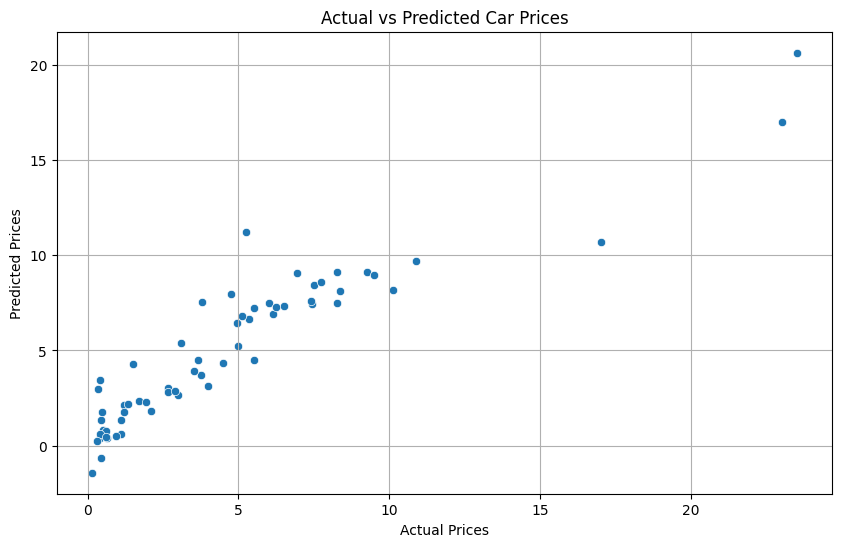

In [2]:
# Car Price Prediction with Machine Learning

# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "car data.csv"
data = pd.read_csv(url)

# Display dataset preview
def preview_data(data):
    print("Dataset Preview:")
    print(data.head())

preview_data(data)

# Check for missing values
if data.isnull().sum().sum() == 0:
    print("No missing values detected.")
else:
    print("Missing values found:")
    print(data.isnull().sum())

# Data preprocessing
print("\nData Info:")
data.info()

# Selecting relevant features
# Use 'Selling_Price' as the target variable and drop irrelevant columns
if 'Selling_Price' in data.columns:
    X = data.drop(columns=['Selling_Price', 'Car_Name'])
    y = data['Selling_Price']
else:
    raise KeyError("The 'Selling_Price' column is missing. Ensure the dataset is correct.")

# Handling categorical features
X = pd.get_dummies(X, drop_first=True)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Visualizing predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title("Actual vs Predicted Car Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.grid(True)
plt.show()